In [6]:
# papermill parameters
project="viral-pangenome-discovery"
base="$(homedir())/workspace/$(project)"
ncbi_data_dir="$(base)/data/taxon_10239.genbank"

"/home/jovyan/workspace/viral-pangenome-discovery/data/taxon_10239.genbank"

In [32]:
import Pkg

Pkg.add(url="https://github.com/cjprybol/Mycelia.git", rev="master")
import Mycelia

Pkg.update()

pkgs = [
    "Revise",
    "DataFrames",
    "uCSV",
    "ProgressMeter",
    "FASTX",
    "Revise",
    "Kmers"
]

for pkg in pkgs
    try
        eval(Meta.parse("import $pkg"))
    catch
        Pkg.add(pkg)
        eval(Meta.parse("import $pkg"))
    end
end

    Updating git-repo `https://github.com/cjprybol/Mycelia.git`
   Resolving package versions...
  No Changes to `~/work/viral-pangenome-discovery/Project.toml`
  No Changes to `~/work/viral-pangenome-discovery/Manifest.toml`
    Updating registry at `/opt/julia/registries/General`
    Updating git-repo `https://github.com/cjprybol/Mycelia.git`
  No Changes to `~/work/viral-pangenome-discovery/Project.toml`
  No Changes to `~/work/viral-pangenome-discovery/Manifest.toml`
   Resolving package versions...
    Updating `~/work/viral-pangenome-discovery/Project.toml`
  [445028e4] + Kmers v0.1.0
  No Changes to `~/work/viral-pangenome-discovery/Manifest.toml`


In [11]:
entity_directories = filter(x -> isdir(x), readdir(joinpath(ncbi_data_dir, "ncbi_dataset", "data"), join=true))

50633-element Vector{String}:
 "/home/jovyan/workspace/viral-pangenome-discovery/data/taxon_10239.genbank/ncbi_dataset/data/GCA_000320725.1"
 "/home/jovyan/workspace/viral-pangenome-discovery/data/taxon_10239.genbank/ncbi_dataset/data/GCA_000529295.1"
 "/home/jovyan/workspace/viral-pangenome-discovery/data/taxon_10239.genbank/ncbi_dataset/data/GCA_000529585.1"
 "/home/jovyan/workspace/viral-pangenome-discovery/data/taxon_10239.genbank/ncbi_dataset/data/GCA_000530085.1"
 "/home/jovyan/workspace/viral-pangenome-discovery/data/taxon_10239.genbank/ncbi_dataset/data/GCA_000530135.1"
 "/home/jovyan/workspace/viral-pangenome-discovery/data/taxon_10239.genbank/ncbi_dataset/data/GCA_000530235.2"
 "/home/jovyan/workspace/viral-pangenome-discovery/data/taxon_10239.genbank/ncbi_dataset/data/GCA_000530255.2"
 "/home/jovyan/workspace/viral-pangenome-discovery/data/taxon_10239.genbank/ncbi_dataset/data/GCA_000689295.1"
 "/home/jovyan/workspace/viral-pangenome-discovery/data/taxon_10239.genbank/ncbi_d

In [29]:
fastas = String[]
for dir in entity_directories
    matching_fastas = filter(x -> occursin(basename(dir), basename(x)) && occursin(".fna", x), readdir(dir, join=true))
    @assert length(matching_fastas) <= 1 "$(matching_fastas)"
    if !isempty(matching_fastas)
        push!(fastas, first(matching_fastas))
    end
end 

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{2}, 3, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 942], [0, 1, 7, 22, 32], false)


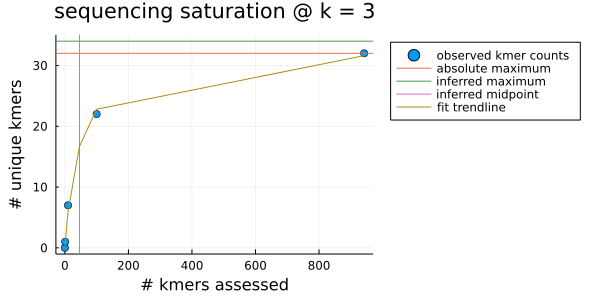

  4.261961 seconds (9.43 M allocations: 544.095 MiB, 3.83% gc time, 99.95% compilation time)
(k, predicted_saturation) = (3, 1.0625)
kmer_type = Kmers.DNAKmer{5, 1}


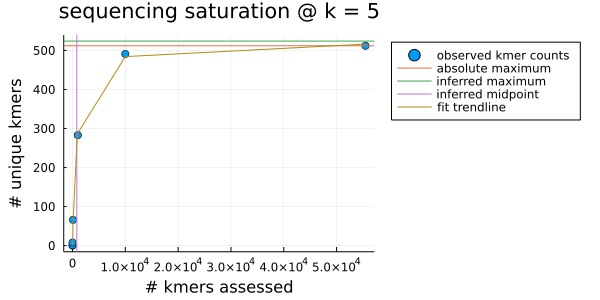

(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 55472], [0, 1, 8, 66, 283, 491, 512], false)
  0.000080 seconds (212 allocations: 23.125 KiB)
(k, predicted_saturation) = (5, 1.0234375)
kmer_type = Kmers.DNAKmer{7, 1}


Progress:  20%|████████                                 |  ETA: 0:00:04

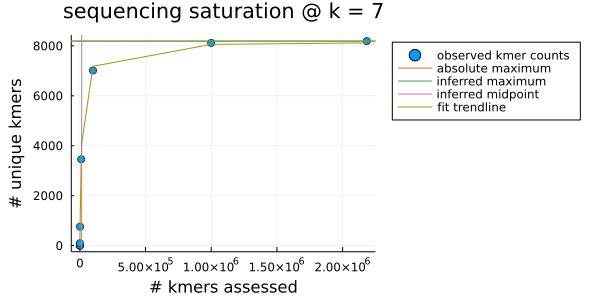

(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 2183686], [0, 1, 9, 94, 759, 3458, 7014, 8120, 8192], false)
  0.000079 seconds (256 allocations: 30.250 KiB)
(k, predicted_saturation) = (7, 1.0)
kmer_type = Kmers.DNAKmer{11, 1}


Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:00

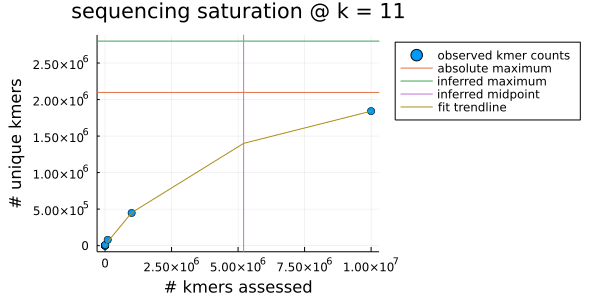

(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000], [0, 1, 10, 100, 994, 9574, 79135, 447018, 1841573], false)
  0.000079 seconds (234 allocations: 27.594 KiB)
(k, predicted_saturation) = (11, 1.3353614807128906)
kmer_type = Kmers.DNAKmer{13, 1}


Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:01

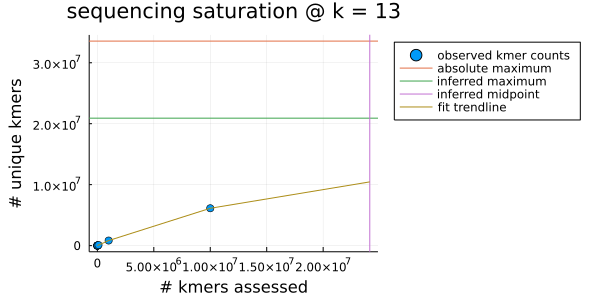

(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000], [0, 1, 10, 100, 998, 9840, 93728, 831414, 6128230], false)
  0.000078 seconds (291 allocations: 34.688 KiB)
(k, predicted_saturation) = (13, 0.6233153939247131)
kmer_type = Kmers.DNAKmer{17, 1}


Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:01

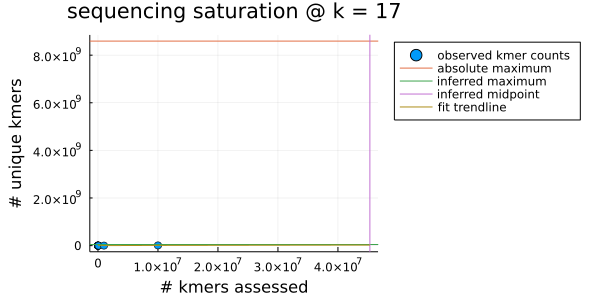

(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000], [0, 1, 10, 100, 1000, 9916, 97772, 985458, 8248849], false)
  0.000078 seconds (300 allocations: 35.562 KiB)
(k, predicted_saturation) = (17, 0.0053127005230635405)
chosen k = 17


17

In [30]:
Mycelia.assess_dnamer_saturation(fastas)

In [37]:
# 1_552_665_911
expected_17mer_diversity_of_all_viruses = Int(round(8248849 / 0.0053127005230635405))

1552665911

In [38]:
# 9_831_668
expected_13mer_diversity_saturation_of_all_viruses = Int(ceil(6128230/0.6233153939247131))

9831668

In [ ]:
# this would probably go into the supplement
# have joint with observed be a main figure